Время выполнения: 0.0140 секунд


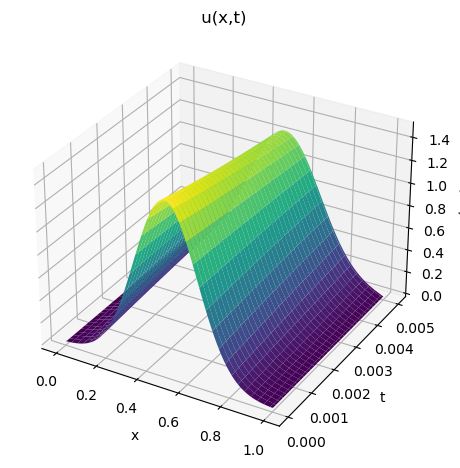

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
import time 

L = 1        
T = 0.005    
Nx = 100    
Nt = 100    
h = L / Nx  
tau = T / Nt 

if tau / h**2 > 0.5:
    print("Внимание! Схема может быть нестабильной.")

x = np.linspace(0, L, Nx+1)
t = np.linspace(0, T, Nt+1)

def q(xx):
    return (1 + 0.5) * np.exp(-(xx - 0.5)**2 / 0.045)

u = np.zeros((Nx+1, Nt+1))

start_time = time.time()

for i in range(Nx+1):
    u[i][0] = q(x[i])

for k in range(0, Nt):
    for i in range(1, Nx):
        u[i, k+1] = u[i, k] + (tau/h**2) * (u[i+1, k] - 2 * u[i, k] + u[i-1, k])

end_time = time.time()
execution_time = end_time - start_time

print(f"Время выполнения: {execution_time:.4f} секунд")

X, T_grid = np.meshgrid(x, t)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X, T_grid, u.T, cmap='viridis')  #
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')
ax.set_title(' u(x,t)')

plt.show()
